**Notebook 01:** Qualidade dos dados e limpeza (Data Quality & Cleaning)

---



#Sistema Inteligente de Retenção de Clientes



**Objetivo**: Verificar e garantir a qualidade dos dados antes de qualquer análise ou modelagem.

**Autor**: Ivan  

**Dataset:** Telco Customer Churn (Kaggle)

**Data**: Fevereiro 2026

---

#Checklist de Qualidade



Neste notebook, vamos verificar:

1. **Estrutura dos dados** - dimensões, tipos, colunas
2. **Valores ausentes** - identificar e tratar missing values
3. **Duplicatas** - remover registros duplicados
4. **Tipos de dados** - corrigir tipos incorretos
5. **Valores inconsistentes** - padronizar categorias
6. **Outliers** - identificar valores extremos
7. **Valores ilógicos** - detectar impossibilidades
8. **Exportação** - salvar dataset limpo

#Dicionário de Dados



| Coluna | Tipo | Descrição |
|--------|------|-----------|
| customerID | String | ID único do cliente |
| gender | Categórica | 'Feminino' 'Masculino' |
| SeniorCitizen | Binária | 1=Idoso, 0=Não idoso |
| Partner | Binária | Tem parceiro? (Sim/Não) |
| Dependents | Binária | Tem dependentes? (Sim/Não) |
| tenure | Numérica | Total de Meses como cliente |
| PhoneService | Binária | Tem serviço telefônico? (Sim/Não)|
| MultipleLines | Categórica | Múltiplas linhas? (Sim/Não/Sem serviço telefonico)|
| InternetService | Categórica | DSL/Fibra/Nenhum |
| OnlineSecurity | Categórica | Segurança online? (Sim/Não/Sem serviço internet)|
| OnlineBackup | Categórica | Backup online? Segurança online? (Sim/Não/Sem serviço internet)|
| DeviceProtection | Categórica | Proteção de dispositivo? (Sim/Não/Sem serviço internet)|
| TechSupport | Categórica | Suporte técnico? (Sim/Não/Sem serviço internet)|
| StreamingTV | Categórica | TV streaming?  (Sim/Não/Sem serviço internet)|
| StreamingMovies | Categórica | Filmes streaming?  (Sim/Não/Sem serviço internet)|
| Contract | Categórica | Tipo de contrato (Mensal, Anual, Bianual)|
| PaperlessBilling | Binária | Fatura digital? (Sim/Não) |
| PaymentMethod | Categórica | Método de pagamento (Cheque eletrônico, Cheque correio, Transf. bancária (automática), Cartão de crédito (automático)|
| MonthlyCharges | Numérica | Cobrança mensal |
| TotalCharges | Numérica | Total gasto |
| Churn | Binária | Target: Cancelou? (Sim/Não) |

#1. Importação das Bibliotecas e Configuração Inicial

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


#2. Carregamento dos Dados

**Fonte**: Dataset de Churn de Telecomunicações  
**Formato**: CSV  
**Encoding**: UTF-8

---

In [ ]:
#Carregar dados brutos
'''df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')'''
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("="*80)
print("DATASET CARREGADO")
print("="*80)
print(f"\n Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"\n Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET CARREGADO

 Dimensões: 7,043 linhas × 21 colunas

 Tamanho em memória: 6.82 MB


#3. Inspeção Inicial

Vamos fazer uma primeira análise visual dos dados para entender sua estrutura.

In [ ]:
print("\n PRIMEIRAS 5 LINHAS:\n")
display(df.head())


 PRIMEIRAS 5 LINHAS:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("\n ÚLTIMAS 5 LINHAS:\n")
display(df.tail())


 ÚLTIMAS 5 LINHAS:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print("\n AMOSTRA ALEATÓRIA:\n")
display(df.sample(5, random_state=42))


 AMOSTRA ALEATÓRIA:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


#4. Estrutura e Tipos de Dados

In [ ]:
print("\n INFORMAÇÕES DO DATASET:\n")
print(df.info())


 INFORMAÇÕES DO DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [ ]:
print("\n RESUMO DOS TIPOS:\n")
print(f"  • Numéricas (int/float): {df.select_dtypes(include=np.number).shape[1]}")
print(f"  • Categóricas (object): {df.select_dtypes(include='object').shape[1]}")
print(f"  • Outras: {df.select_dtypes(exclude=[np.number, 'object']).shape[1]}")


 RESUMO DOS TIPOS:

  • Numéricas (int/float): 3
  • Categóricas (object): 18
  • Outras: 0


In [ ]:
print("\nESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:\n")
display(df.describe())


ESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print("\nESTATÍSTICAS DESCRITIVAS - CATEGÓRICAS:\n")
display(df.describe(include='object'))


ESTATÍSTICAS DESCRITIVAS - CATEGÓRICAS:



,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
print("\n VALORES ÚNICOS POR COLUNA:\n")

for col in df.columns:
    print(f"  '{col}': {df[col].nunique()} valores únicos")


 VALORES ÚNICOS POR COLUNA:

  'customerID': 7043 valores únicos
  'gender': 2 valores únicos
  'SeniorCitizen': 2 valores únicos
  'Partner': 2 valores únicos
  'Dependents': 2 valores únicos
  'tenure': 73 valores únicos
  'PhoneService': 2 valores únicos
  'MultipleLines': 3 valores únicos
  'InternetService': 3 valores únicos
  'OnlineSecurity': 3 valores únicos
  'OnlineBackup': 3 valores únicos
  'DeviceProtection': 3 valores únicos
  'TechSupport': 3 valores únicos
  'StreamingTV': 3 valores únicos
  'StreamingMovies': 3 valores únicos
  'Contract': 3 valores únicos
  'PaperlessBilling': 2 valores únicos
  'PaymentMethod': 4 valores únicos
  'MonthlyCharges': 1585 valores únicos
  'TotalCharges': 6531 valores únicos
  'Churn': 2 valores únicos


In [ ]:
print("\nVALORES ÚNICOS PARA AS COLUNAS CATEGÓRICAS:\n")

categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    if col in df.columns:
        print(f"  '{col}': {df[col].unique().tolist()}")
    else:
        print(f"  Coluna '{col}' não encontrada no DataFrame.")


VALORES ÚNICOS PARA AS COLUNAS CATEGÓRICAS:

  'gender': ['Female', 'Male']
  'SeniorCitizen': [0, 1]
  'Partner': ['Yes', 'No']
  'Dependents': ['No', 'Yes']
  'PhoneService': ['No', 'Yes']
  'MultipleLines': ['No phone service', 'No', 'Yes']
  'InternetService': ['DSL', 'Fiber optic', 'No']
  'OnlineSecurity': ['No', 'Yes', 'No internet service']
  'OnlineBackup': ['Yes', 'No', 'No internet service']
  'DeviceProtection': ['No', 'Yes', 'No internet service']
  'TechSupport': ['No', 'Yes', 'No internet service']
  'StreamingTV': ['No', 'Yes', 'No internet service']
  'StreamingMovies': ['No', 'Yes', 'No internet service']
  'Contract': ['Month-to-month', 'One year', 'Two year']
  'PaperlessBilling': ['Yes', 'No']
  'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
  'Churn': ['No', 'Yes']


##4.1 Verificação de Tipos Incorretos


In [ ]:
print("\nVERIFICANDO COLUNAS COM TIPOS SUSPEITOS:\n")

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    #Tentar converter para numérico
    try:
        numeric_test = pd.to_numeric(df[col], errors='coerce')

        #Se mais de 80% dos valores forem numéricos, é suspeito
        if numeric_test.notna().sum() / len(df) > 0.8:
            print(f"  '{col}' parece ser numérica mas está como object")
            print(f"     Valores únicos: {df[col].nunique()}")
            print(f"     Exemplo: {df[col].head(3).tolist()}")
    except:
        pass


VERIFICANDO COLUNAS COM TIPOS SUSPEITOS:

  'TotalCharges' parece ser numérica mas está como object
     Valores únicos: 6531
     Exemplo: ['29.85', '1889.5', '108.15']


#Observações Iniciais

Com base na inspeção:

1. **customerID**: Identificador único (não será usado na modelagem)
2. **Churn**: Variável alvo (Yes/No)
3. **TotalCharges**: Está como `object` mas deveria ser numérica
4. **SeniorCitizen**: Binária (0/1) mas pode ser categórica
5. Várias colunas categóricas com valores "No internet service" ou "No phone service"

**Próximos passos:**
- Converter TotalCharges para numérico
- Tratar valores ausentes
- Tratar valores duoplicados
- Analisar e Padronizar categorias (se necessário)

#5 Tratamento dos Dados

### 5.1. Investigação de 'TotalCharges'

* **Problema identificado:** TotalCharges está como `object` (texto)  

*  **Hipótese:** Pode conter espaços vazios ou caracteres não numéricos, onde estes, geralmente representam clientes novos que ainda não acumularam cobranças totais

In [ ]:
print("\nANÁLISE DA COLUNA 'TotalCharges':\n")
print(f"Tipo atual: {df['TotalCharges'].dtype}")
print(f"\nValores únicos (primeiros 10): {df['TotalCharges'].unique()[:10]}")


ANÁLISE DA COLUNA 'TotalCharges':

Tipo atual: object

Valores únicos (primeiros 10): ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [ ]:
#Verificar valores não numéricos
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nRegistros com TotalCharges não numérico: {len(non_numeric)}")

if len(non_numeric) > 0:
    print("\nExemplos:")
    display(non_numeric[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head(11))



Registros com TotalCharges não numérico: 11

Exemplos:


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


**Decisão:**

- Converter 'TotalCharges' para numérico (espaços vazios → NaN)

- Analisar relação com 'tenure'
  - Se tenure=0, preencher 'TotalCharges' com 0
  
  - Caso contrário, preencher com 'MonthlyCharges' (primeira cobrança)

In [ ]:
#Converter para numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Verificar nulos após conversão
nulos_total_charges = df['TotalCharges'].isna().sum()
print(f"Conversão concluída!")
print(f"Valores nulos após conversão: {nulos_total_charges}")

Conversão concluída!
Valores nulos após conversão: 11


In [ ]:
#Analisar casos com TotalCharges nulo
if nulos_total_charges > 0:
    print("\nANÁLISE DOS CASOS COM TOTALCHARGES NULO:\n")
    nulos_df = df[df['TotalCharges'].isna()]

    print(f"\nDistribuição de tenure nos casos nulos:")
    print(nulos_df['tenure'].value_counts().sort_index())

    print(f"\nEstatísticas:")
    display(nulos_df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


ANÁLISE DOS CASOS COM TOTALCHARGES NULO:


Distribuição de tenure nos casos nulos:
tenure
0    11
Name: count, dtype: int64

Estatísticas:


,tenure,MonthlyCharges,TotalCharges
count,11.0,11.000000,0.0
mean,0.0,41.418182,NaN
std,0.0,23.831484,NaN
min,0.0,19.700000,NaN
25%,0.0,20.125000,NaN
50%,0.0,25.750000,NaN
75%,0.0,58.975000,NaN
max,0.0,80.850000,NaN


**Análise:** Todos os casos com TotalCharges nulo têm tenure = 0

**Decisão:** Preencher com 0 (cliente novo sem cobrança ainda)

In [ ]:
#Preencher valores nulos com valor = 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("Valores ausentes em TotalCharges tratados!")
print(f"Nulos restantes: {df['TotalCharges'].isna().sum()}")

Valores ausentes em TotalCharges tratados!
Nulos restantes: 0


### 5.2. Análise de Valores Ausentes

- Não foram identificados valores ausentes:

In [ ]:
missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Nulos': df.isnull().sum(),
    'Percentual (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Nulos'] > 0].sort_values('Nulos', ascending=False)

if len(missing_data) > 0:
    display(missing_data)

    # Visualização
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_data, x='Percentual (%)', y='Coluna', palette='Reds_r')
    plt.title('Percentual de Valores Ausentes por Coluna', fontweight='bold', fontsize=14)
    plt.xlabel('Percentual (%)')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum valor ausente explícito encontrado!")

Nenhum valor ausente explícito encontrado!


### 5.3. Verificação de Duplicatas

In [ ]:
duplicatas_totais = df.duplicated().sum()
print(f"\nLinhas completamente duplicadas: {duplicatas_totais}")


Linhas completamente duplicadas: 0


In [ ]:
#Verificar IDs únicos
ids_unicos = df['customerID'].nunique()
total_linhas = len(df)

print(f"\nIDs únicos: {ids_unicos:,}")
print(f"Total de linhas: {total_linhas:,}")


IDs únicos: 7,043
Total de linhas: 7,043


In [ ]:
if ids_unicos < total_linhas:
    ids_duplicados = total_linhas - ids_unicos
    print(f"\n{ids_duplicados} IDs duplicados encontrados!\n")

    # Mostrar exemplos
    duplicated_ids = df[df.duplicated(subset=['customerID'], keep=False)].sort_values('customerID')
    print(f"\nExemplos:")
    display(duplicated_ids.head(10))
else:
    print("\nTodos os IDs são únicos!\n")


Todos os IDs são únicos!



###5.3. Padronização de Valores Categóricos

**Problemas identificados:**

- Valores como "No internet service" e "No phone service"

- Possíveis espaços em branco

- Inconsistência de maiúsculas/minúsculas

In [ ]:
object_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nTotal de colunas categóricas: {len(object_cols)}")
print(f"Colunas: {object_cols}\n")


Total de colunas categóricas: 17
Colunas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



In [ ]:
# Mostrar valores únicos das primeiras colunas
for col in object_cols[:8]:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(f"  Valores: {df[col].unique()}")


customerID: 7043 valores únicos
  Valores: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: 2 valores únicos
  Valores: ['Female' 'Male']

Partner: 2 valores únicos
  Valores: ['Yes' 'No']

Dependents: 2 valores únicos
  Valores: ['No' 'Yes']

PhoneService: 2 valores únicos
  Valores: ['No' 'Yes']

MultipleLines: 3 valores únicos
  Valores: ['No phone service' 'No' 'Yes']

InternetService: 3 valores únicos
  Valores: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: 3 valores únicos
  Valores: ['No' 'Yes' 'No internet service']


**Premissas**:

- **valor = 'No'**: Pode indicar que o cliente tem serviço de internet, mas escolheu não assinar o serviço específico como: 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' ou 'StreamingMovies'

- **valor = 'No internet service'**: Pode indicar que o cliente não possui serviço de internet da empresa e consequentemente nenhum dos serviços específicos.

#### Possíveis inconsistencias entre `PhoneService` e `MultipleLines`

- Não identificado iconsistencias entre PhoneService e MultipleLines `PhoneService` = 'Yes' e `MultipleLines` = 'No phone service'.

- Não é possível padronizar na coluna MultipleLines os valores = 'No phone service' como 'No', pois é possível que o cliente tenha o serviço, porém opte em não tem MultipleLines.



In [ ]:
# Filtrar registros onde PhoneService é 'Yes' e MultipleLines é 'No phone service'
inconsistent_phone_service = df[
    (df['PhoneService'] == 'Yes') &
    (df['MultipleLines'] == 'No phone service')
]

print(f"Registros com PhoneService = 'Yes' e MultipleLines = 'No phone service': {len(inconsistent_phone_service)}")

if len(inconsistent_phone_service) > 0:
    print("\nExemplos de registros inconsistentes:")
    display(inconsistent_phone_service[['customerID', 'PhoneService', 'MultipleLines']].head())
else:
    print("Nenhuma inconsistência encontrada para PhoneService e MultipleLines.")

Registros com PhoneService = 'Yes' e MultipleLines = 'No phone service': 0
Nenhuma inconsistência encontrada para PhoneService e MultipleLines.


In [ ]:
print("\nContagem de valores para a coluna 'PhoneService':\n")
phone_service_counts = df['PhoneService'].value_counts()
display(phone_service_counts)

print(f"\nTotal de PhoneService = 'Yes': {phone_service_counts.get('Yes', 0)} clientes")
print(f"Total de PhoneService = 'No': {phone_service_counts.get('No', 0)} clientes")


Contagem de valores para a coluna 'PhoneService':



,count
PhoneService,
Yes,6361
No,682



Total de PhoneService = 'Yes': 6361 clientes
Total de PhoneService = 'No': 682 clientes


In [ ]:
# Filtrar o DataFrame para clientes com PhoneService = 'Yes'
phone_service_yes_df = df[df['PhoneService'] == 'Yes']

# Contar os valores únicos na coluna MultipleLines para esse subconjunto
multiple_lines_counts = phone_service_yes_df['MultipleLines'].value_counts()

print("Distribuição de 'MultipleLines' para clientes com 'PhoneService' = 'Yes':\n")

if 'No' in multiple_lines_counts:
    print(f"  - 'MultipleLines' = 'No': {multiple_lines_counts['No']} clientes")
if 'Yes' in multiple_lines_counts:
    print(f"  - 'MultipleLines' = 'Yes': {multiple_lines_counts['Yes']} clientes")
if 'No phone service' in multiple_lines_counts:
    print(f"  - 'MultipleLines' = 'No phone service': {multiple_lines_counts['No phone service']} clientes")
else:
    print("  - 'MultipleLines' = 'No phone service': 0 clientes (não encontrado para PhoneService = 'Yes')")

Distribuição de 'MultipleLines' para clientes com 'PhoneService' = 'Yes':

  - 'MultipleLines' = 'No': 3390 clientes
  - 'MultipleLines' = 'Yes': 2971 clientes
  - 'MultipleLines' = 'No phone service': 0 clientes (não encontrado para PhoneService = 'Yes')


#### Possíveis inconsistencias entre InternetService x serviços de contratação possíveis

- Não identificado iconsistencias

- Não é possível padronizar na coluna MultipleLines os valores = 'No internet service' e 'No', para que:

  - seja mantido a consistência de Estrutura de Dados (implifica o manuseio e a automação do processamento dessas colunas.),
  
  - Haja Clareza e Explicitação(pois apenas 'No', poderia gerar ambiguidade para quem olha a coluna isoladamente, sem verificar InternetService),
  
  - Preparação para Modelagem (pois a distinção entre 'No' e 'No internet service' permite que o modelo aprenda diferentes pesos ou padrões para cada situação).

In [ ]:
# Definir as colunas de serviço de internet a serem verificadas
internet_related_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filtrar clientes que possuem InternetService
with_internet_service_customers = df[df['InternetService'] == 'Fiber optic'].copy()

# Lista para armazenar inconsistências encontradas
inconsistencies_found = []

for col in internet_related_services:
    # Filtrar registros onde InternetService é 'Yes' (especificamente 'Fiber optic' ou 'DSL')
    # e o serviço específico é 'No internet service'
    inconsistent_records = with_internet_service_customers[
        with_internet_service_customers[col] == 'No internet service'
    ]
    if not inconsistent_records.empty:
        inconsistencies_found.append((col, inconsistent_records))

print("Verificando inconsistências entre 'InternetService' = 'Yes' e serviços relacionados como 'No internet service':\n")

if not inconsistencies_found:
    print("  Nenhuma inconsistência encontrada. Todos os clientes com serviço de internet têm os serviços relacionados sem a tag 'No internet service'.")
else:
    print("  Inconsistências encontradas:")
    for col, records in inconsistencies_found:
        print(f"    - Na coluna '{col}': {len(records)} registro(s) inconsistente(s).")
        display(records[['customerID', 'InternetService', col]].head())


Verificando inconsistências entre 'InternetService' = 'Yes' e serviços relacionados como 'No internet service':

  Nenhuma inconsistência encontrada. Todos os clientes com serviço de internet têm os serviços relacionados sem a tag 'No internet service'.


In [ ]:
# Definir as colunas de serviço de internet a serem verificadas
internet_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filtrar clientes que não possuem InternetService
no_internet_service_customers = df[df['InternetService'] == 'No'].copy()

# Lista para armazenar inconsistências encontradas
inconsistencies_found = []

for col in internet_service_cols:
    # Filtrar registros onde InternetService é 'No', mas o serviço específico NÃO é 'No internet service'
    inconsistent_records = no_internet_service_customers[
        no_internet_service_customers[col] != 'No internet service'
    ]
    if not inconsistent_records.empty:
        inconsistencies_found.append((col, inconsistent_records))

print("Verificando inconsistências onde 'InternetService' = 'No':\n")

if not inconsistencies_found:
    print(" Nenhuma inconsistência encontrada. Todos os clientes sem serviço de internet têm os serviços relacionados como 'No internet service'.")
else:
    print("  ❌ Inconsistências encontradas:")
    for col, records in inconsistencies_found:
        print(f"    - Na coluna '{col}': {len(records)} registro(s) inconsistente(s).")
        display(records[['customerID', 'InternetService'] + internet_service_cols].head())


Verificando inconsistências onde 'InternetService' = 'No':

 Nenhuma inconsistência encontrada. Todos os clientes sem serviço de internet têm os serviços relacionados como 'No internet service'.


In [ ]:
from numpy.random import RandomState
# Definir as colunas de serviço de internet para verificar
internet_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Encontrar linhas onde os valores nessas colunas não são todos iguais
# Ou seja, o cliente tem uma combinação de 'Yes', 'No' ou 'No internet service'
mixed_services_rows = df[df.apply(lambda row: row[internet_services].nunique() > 1, axis=1)]

print(f"Total de clientes com serviços de internet mistos: {len(mixed_services_rows)}")

if not mixed_services_rows.empty:
    print("\nExemplos de clientes com serviços de internet mistos (as colunas 'InternetService' e os serviços listados):")
    display(mixed_services_rows[['customerID', 'InternetService'] + internet_services].head())
else:
    print("Nenhum cliente encontrado com uma mistura de 'Yes', 'No' ou 'No internet service' para os serviços de internet listados.")

Total de clientes com serviços de internet mistos: 4540

Exemplos de clientes com serviços de internet mistos (as colunas 'InternetService' e os serviços listados):


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes


In [ ]:
print("\nContagem de valores para a coluna 'InternetService':\n")
internet_service_counts = df['InternetService'].value_counts()
display(internet_service_counts)

print(f"\nTotal de InternetService = 'No': {internet_service_counts.get('No', 0)} clientes")
print(f"Total de InternetService = 'Yes' (DSL ou Fiber optic): {internet_service_counts.get('DSL', 0) + internet_service_counts.get('Fiber optic', 0)} clientes")


Contagem de valores para a coluna 'InternetService':



,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



Total de InternetService = 'No': 1526 clientes
Total de InternetService = 'Yes' (DSL ou Fiber optic): 5517 clientes


In [ ]:
internet_related_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filtrar clientes que possuem InternetService (ou seja, não são 'No')
internet_yes_customers = df[df['InternetService'] != 'No'].copy()

# Preparar uma lista para armazenar os resultados
results = []

for col in internet_related_services:
    no_internet_service_count = (internet_yes_customers[col] == 'No internet service').sum()
    no_count = (internet_yes_customers[col] == 'No').sum()
    yes_count = (internet_yes_customers[col] == 'Yes').sum()
    results.append({
        'Coluna': col,
        'Total_Yes': yes_count,
        'Total_No': no_count,
        'No internet service': no_internet_service_count,
    })

# Criar um DataFrame a partir dos resultados
summary_df = pd.DataFrame(results)

print("\nResumo dos valores 'Yes', 'No' e 'No internet service', para clientes com InternetService = 'Yes':\n")
display(summary_df)



Resumo dos valores 'Yes', 'No' e 'No internet service', para clientes com InternetService = 'Yes':



,Coluna,Total_Yes,Total_No,No internet service
0,OnlineSecurity,2019,3498,0
1,OnlineBackup,2429,3088,0
2,DeviceProtection,2422,3095,0
3,TechSupport,2044,3473,0
4,StreamingTV,2707,2810,0
5,StreamingMovies,2732,2785,0


## 6. Detecção de Outliers

**Método:** IQR (Interquartile Range)  

**Decisão:** Identificar mas NÃO remover (outliers podem ser clientes importantes)


Colunas numéricas analisadas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']



,Coluna,Outliers,Percentual (%),Min,Max,Limite Inferior,Limite Superior
0,SeniorCitizen,1142,16.21,0,1,0.0,0.0


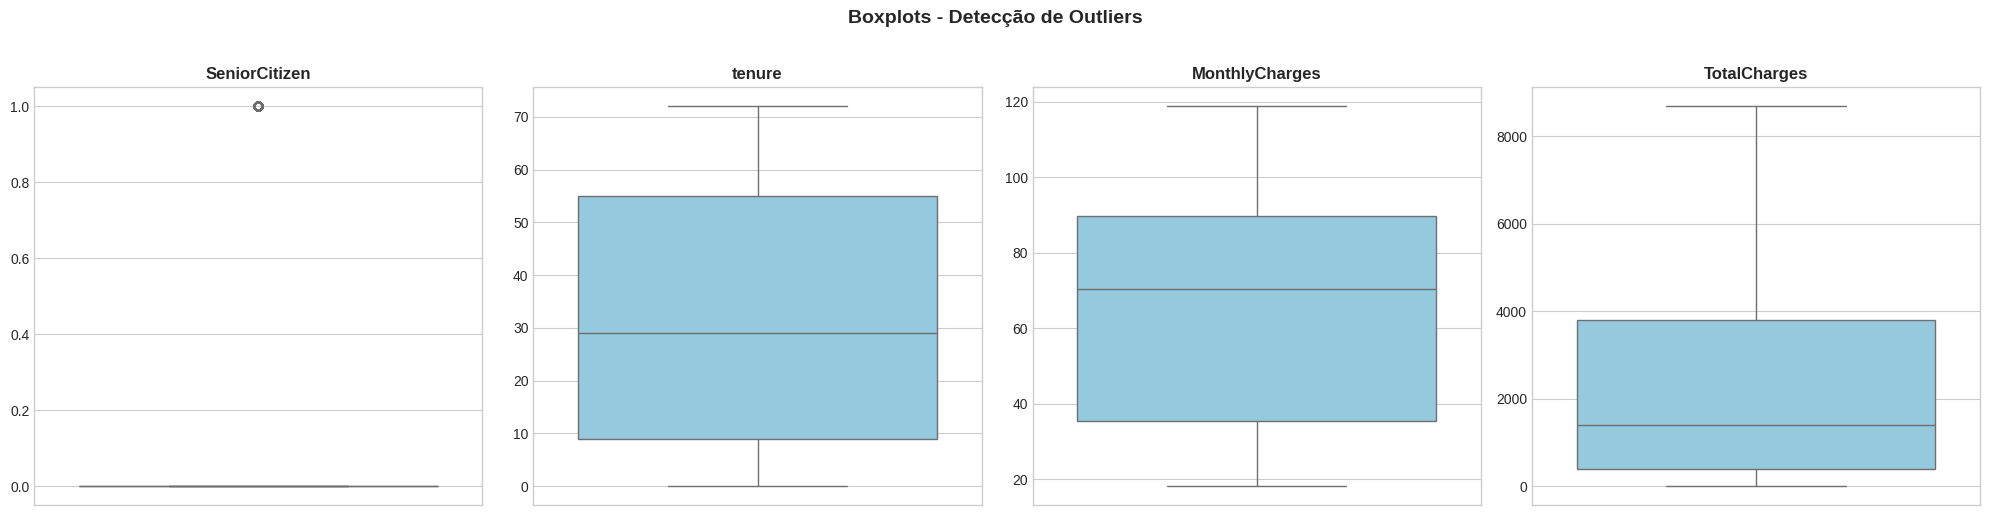


DECISÃO: Outliers identificados mas MANTIDOS.
   Justificativa: Podem representar clientes VIP ou casos especiais importantes.


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nColunas numéricas analisadas: {numeric_cols}\n")

outliers_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_pct = (outliers / len(df)) * 100

    if outliers > 0:
        outliers_summary.append({
            'Coluna': col,
            'Outliers': outliers,
            'Percentual (%)': round(outliers_pct, 2),
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Limite Inferior': round(lower_bound, 2),
            'Limite Superior': round(upper_bound, 2)
        })

if outliers_summary:
    outliers_df = pd.DataFrame(outliers_summary)
    display(outliers_df)

    # Visualização
    fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
    if len(numeric_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('')

    plt.suptitle('Boxplots - Detecção de Outliers', fontweight='bold', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

    print("\nDECISÃO: Outliers identificados mas MANTIDOS.")
    print("   Justificativa: Podem representar clientes VIP ou casos especiais importantes.")

else:
    print("\nNenhum outlier significativo detectado!")

## 7. Validação de Consistência

**Verificações:**

- Valores negativos em colunas que não deveriam ter

- Consistência entre tenure, MonthlyCharges e TotalCharges

### 7.1. Analisando Valores Negativos

In [ ]:
issues_found = []

# Tenure negativo
if (df['tenure'] < 0).any():
    count = (df['tenure'] < 0).sum()
    issues_found.append(f"tenure negativo: {count} casos")
    df = df[df['tenure'] >= 0]

# MonthlyCharges negativo
if (df['MonthlyCharges'] < 0).any():
    count = (df['MonthlyCharges'] < 0).sum()
    issues_found.append(f"MonthlyCharges negativo: {count} casos")
    df = df[df['MonthlyCharges'] >= 0]

# TotalCharges negativo
if (df['TotalCharges'] < 0).any():
    count = (df['TotalCharges'] < 0).sum()
    issues_found.append(f"TotalCharges negativo: {count} casos")
    df = df[df['TotalCharges'] >= 0]

if issues_found:
    print("\nPROBLEMAS ENCONTRADOS E CORRIGIDOS:")
    for issue in issues_found:
        print(f"  • {issue}")
else:
    print("\nNenhum valor ilógico encontrado!")


Nenhum valor ilógico encontrado!


### 7.2. Análise de Consistência: TotalCharges vs (MonthlyCharges × tenure)

In [ ]:
# Calcular TotalCharges esperado
df['Expected_TotalCharges'] = df['MonthlyCharges'] * df['tenure']

# Calcular diferença
df['Diff'] = abs(df['TotalCharges'] - df['Expected_TotalCharges'])

# Permitir diferença de até 10% (descontos, promoções, etc.)
tolerance = df['Expected_TotalCharges'] * 0.10
inconsistent = (df['Diff'] > tolerance) & (df['tenure'] > 0)

print(f"Casos com diferença > 10%: {inconsistent.sum()} ({inconsistent.sum()/len(df)*100:.2f}%)")

Casos com diferença > 10%: 381 (5.41%)


In [ ]:
if inconsistent.sum() > 0:
    print("\nExemplos de inconsistências:")
    display(df[inconsistent][['tenure', 'MonthlyCharges', 'TotalCharges',
                               'Expected_TotalCharges', 'Diff']].head(10))


Exemplos de inconsistências:


,tenure,MonthlyCharges,TotalCharges,Expected_TotalCharges,Diff
21,12,19.80,202.25,237.60,35.35
42,17,20.75,418.25,352.75,65.50
47,2,80.65,144.15,161.30,17.15
69,10,79.85,887.35,798.50,88.85
77,8,54.65,482.25,437.20,45.05
105,5,24.30,100.20,121.50,21.30
124,4,20.85,62.90,83.40,20.50
171,2,104.40,242.80,208.80,34.00
223,4,50.05,179.35,200.20,20.85
239,16,19.75,284.35,316.00,31.65


In [ ]:
print("\n5 Maiores Diferenças (Diff):\n")
display(df.nlargest(5, 'Diff')[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Expected_TotalCharges', 'Diff']])

print("\n5 Menores Diferenças (Diff):\n")
display(df.nsmallest(5, 'Diff')[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Expected_TotalCharges', 'Diff']])


5 Maiores Diferenças (Diff):



,customerID,tenure,MonthlyCharges,TotalCharges,Expected_TotalCharges,Diff
1418,9350-VLHMB,67,89.55,6373.10,5999.85,373.25
1746,3963-RYFNS,72,116.45,8013.55,8384.40,370.85
6596,0083-PIVIK,64,81.25,5567.55,5200.00,367.55
1274,7182-OVLBJ,62,101.15,6638.35,6271.30,367.05
1997,0266-CLZKZ,67,105.65,6717.90,7078.55,360.65



5 Menores Diferenças (Diff):



,customerID,tenure,MonthlyCharges,TotalCharges,Expected_TotalCharges,Diff
0,7590-VHVEG,1,29.85,29.85,29.85,0.0
20,8779-QRDMV,1,39.65,39.65,39.65,0.0
22,1066-JKSGK,1,20.15,20.15,20.15,0.0
27,8665-UTDHZ,1,30.20,30.20,30.20,0.0
33,7310-EGVHZ,1,20.20,20.20,20.20,0.0


In [ ]:
print("\nDECISÃO: Manter valores originais.")
print("Justificativa: Diferenças podem ser devido a descontos, promoções ou taxas únicas.")

#Remover colunas auxiliares
df = df.drop(['Expected_TotalCharges', 'Diff'], axis=1)


DECISÃO: Manter valores originais.
Justificativa: Diferenças podem ser devido a descontos, promoções ou taxas únicas.


## 8. Resumo Final da Qualidade

In [ ]:
quality_summary = {
    'Métrica': [
        'Dimensões Finais',
        'Colunas Numéricas',
        'Colunas Categóricas',
        'Valores Nulos',
        'Duplicatas',
        'Outliers',
        'Valores Ilógicos',
        'Status'
    ],
    'Resultado': [
        f"{df.shape[0]:,} linhas × {df.shape[1]} colunas",
        df.select_dtypes(include=np.number).shape[1],
        df.select_dtypes(include='object').shape[1],
        f"{df.isnull().sum().sum()} (0.00%)",
        "0 (removidas)",
        f"{len(outliers_summary)} colunas (mantidos)",
        "0 (corrigidos)" if not issues_found else f"{len(issues_found)} (corrigidos)",
        'DATASET LIMPO E PRONTO'
    ]
}

quality_df = pd.DataFrame(quality_summary)
display(quality_df)

,Métrica,Resultado
0,Dimensões Finais,"7,043 linhas × 21 colunas"
1,Colunas Numéricas,4
2,Colunas Categóricas,17
3,Valores Nulos,0 (0.00%)
4,Duplicatas,0 (removidas)
5,Outliers,1 colunas (mantidos)
6,Valores Ilógicos,0 (corrigidos)
7,Status,DATASET LIMPO E PRONTO


## 9. Exportação do Dataset Limpo

In [ ]:
df.to_csv('/content/processed_data.csv', index=False)

# Verificar
import os
print(f"Salvo em: /content/processed_data.csv")
print(f"Tamanho: {df.shape}")
print(f"Espaço: {os.path.getsize('/content/processed_data.csv') / 1024:.1f} KB")

Salvo em: /content/processed_data.csv
Tamanho: (7043, 21)
Espaço: 949.1 KB


## 10. Próximos Passos

Com o dataset limpo, seguiremos para:

**Notebook 02 - Exploratory Data Analysis:**

- Análise da distribuição de Churn
- Relação entre variáveis e churn
- Visualizações e insights de negócio
- Identificação de padrões

---

**Notebook 01 Concluído!**